In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16

In [44]:
study_results.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0

In [45]:
# Display the data table for preview
merged_df = pd.merge(mouse_metadata, study_results,on="Mouse ID")
merged_df.head(10)

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   
5     k403     Ramicane  Male          21          16         25   
6     k403     Ramicane  Male          21          16         30   
7     k403     Ramicane  Male          21          16         35   
8     k403     Ramicane  Male          21          16         40   
9     k403     Ramicane  Male          21          16         45   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  
5           33.464577                 1  
6           31.099498                 1  
7           26.546993                 1  
8           24.365505                 1  
9           22.050126                 1

In [46]:
# Checking the number of mice.
#mouse_metadata["Mouse ID"].value_counts() 
len(mouse_metadata["Mouse ID"].value_counts())

249

In [47]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#THE duplicate signifies that there is one duplicate ID
duplicate_mouse_id = merged_df.duplicated(subset=["Mouse ID","Timepoint"])

# Optional: Get all the data for the duplicate mouse ID. 
merged_df[duplicate_mouse_id ].values

##merged_df[merged_df["Mouse ID"] == merged_df.duplicated(merged_df["Mouse ID","Timepoint"])]

array([['g989', 'Propriva', 'Female', 21, 26, 0, 45.0, 0],
       ['g989', 'Propriva', 'Female', 21, 26, 5, 47.57039208, 0],
       ['g989', 'Propriva', 'Female', 21, 26, 10, 49.8805278, 0],
       ['g989', 'Propriva', 'Female', 21, 26, 15, 53.44201976, 0],
       ['g989', 'Propriva', 'Female', 21, 26, 20, 54.65765008, 1]],
      dtype=object)

In [48]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_df = merged_df[merged_df["Mouse ID"] !="g989"]
clean_mouse_study_df

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1880 rows x 8 columns]

In [49]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_study_df["Mouse ID"].unique())

248

Summary Statistics

In [50]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
drug_regimen_group = clean_mouse_study_df.groupby(["Drug Regimen"])
drug_regimen_group

In [51]:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

avg_tumor_vol = drug_regimen_group["Tumor Volume (mm3)"].mean()

median_tumor_vol = drug_regimen_group["Tumor Volume (mm3)"].median()

var_tumor_vol = drug_regimen_group["Tumor Volume (mm3)"].var()

std_tumor_vol = drug_regimen_group["Tumor Volume (mm3)"].std()

sem_tumor_vol = drug_regimen_group["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.

tumor_volume_df = pd.DataFrame({
                                "Mean Avg Tumor Volume": avg_tumor_vol,
                                "Median Tumor Volume": median_tumor_vol,
                                "Variance Tumor volume": var_tumor_vol,
                                "St. Deviation Tumor Volume": std_tumor_vol,
                                "St. Error Tumor Volume": sem_tumor_vol
                                })

tumor_volume_df 

Mean Avg Tumor Volume  Median Tumor Volume  \
Drug Regimen                                               
Capomulin                 40.675741            41.557809   
Ceftamin                  52.591172            51.776157   
Infubinol                 52.884795            51.820584   
Ketapril                  55.235638            53.698743   
Naftisol                  54.331565            52.509285   
Placebo                   54.033581            52.288934   
Propriva                  52.320930            50.446266   
Ramicane                  40.216745            40.673236   
Stelasyn                  54.233149            52.431737   
Zoniferol                 53.236507            51.818479   

              Variance Tumor volume  St. Deviation Tumor Volume  \
Drug Regimen                                                      
Capomulin                 24.947764                    4.994774   
Ceftamin                  39.290177                    6.268188   
Infubinol                 43.128684                    6.567243   
Ketapril                  68.553577                    8.279709   
Naftisol                  66.173479                    8.134708   
Placebo                   61.168083                    7.821003   
Propriva                  43.852013                    6.622085   
Ramicane                  23.486704                    4.846308   
Stelasyn                  59.450562                    7.710419   
Zoniferol                 48.533355                    6.966589   

              St. Error Tumor Volume  
Drug Regimen                          
Capomulin                   0.329346  
Ceftamin                    0.469821  
Infubinol                   0.492236  
Ketapril                    0.603860  
Naftisol                    0.596466  
Placebo                     0.581331  
Propriva                    0.544332  
Ramicane                    0.320955  
Stelasyn                    0.573111  
Zoniferol                   0.516398

In [52]:
# Using the aggregation method, produce the same summary statistics in a single line

tumor_volume_df_two = round(drug_regimen_group["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"]),2)

tumor_volume_df_two = tumor_volume_df_two.rename(columns={"mean": "Mean Tumor Volume",
                                                          "median": "Median Tumor Volume",
                                                          "var": "Variance Tumor Volume",
                                                          "std": "Standard Deviation Tumor Volume",
                                                          "sem": "SEM Tumor volume"})
                                                          
tumor_volume_df_two                                               


Mean Tumor Volume  Median Tumor Volume  Variance Tumor Volume  \
Drug Regimen                                                                  
Capomulin                 40.68                41.56                  24.95   
Ceftamin                  52.59                51.78                  39.29   
Infubinol                 52.88                51.82                  43.13   
Ketapril                  55.24                53.70                  68.55   
Naftisol                  54.33                52.51                  66.17   
Placebo                   54.03                52.29                  61.17   
Propriva                  52.32                50.45                  43.85   
Ramicane                  40.22                40.67                  23.49   
Stelasyn                  54.23                52.43                  59.45   
Zoniferol                 53.24                51.82                  48.53   

              Standard Deviation Tumor Volume  SEM Tumor volume  
Drug Regimen                                                     
Capomulin                                4.99              0.33  
Ceftamin                                 6.27              0.47  
Infubinol                                6.57              0.49  
Ketapril                                 8.28              0.60  
Naftisol                                 8.13              0.60  
Placebo                                  7.82              0.58  
Propriva                                 6.62              0.54  
Ramicane                                 4.85              0.32  
Stelasyn                                 7.71              0.57  
Zoniferol                                6.97              0.52

Bar and Pie Charts

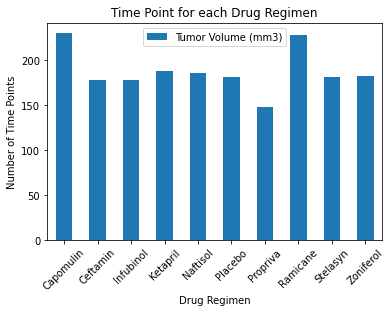

<Figure size 432x288 with 0 Axes>

In [59]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#so we want to group by drug regimen

tp_barplot = drug_regimen_group.count()["Tumor Volume (mm3)"]
pandas_barplot_needs = pd.DataFrame(tp_barplot)

thee_barplot = pandas_barplot_needs.plot.bar(legend=20,rot=45)
plt.ylabel("Number of Time Points")
plt.title("Time Point for each Drug Regimen")
plt.show()
plt.savefig("barplot1")

In [54]:
import numpy as np

Text(0, 0.5, 'Number of Time Points')

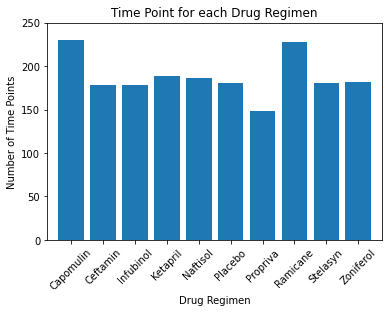

In [60]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(tp_barplot))
tick_locations = [i for i in x_axis]


plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol","Placebo", "Propriva", "Ramicane","Stelasyn","Zoniferol"],rotation=45)

plt.bar(x_axis, pandas_barplot_needs["Tumor Volume (mm3)"], align="center")

plt.xlim(-0.75,len(x_axis)-0.25)

plt.ylim(0,250)

plt.title("Time Point for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Time Points")

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_group = mouse_metadata.groupby("Sex").count()
gender_group


Mouse ID  Drug Regimen  Age_months  Weight (g)
Sex                                                   
Female       124           124         124         124
Male         125           125         125         125

In [68]:
#Labels for pie chart (Female & Male)
labels = [mouse_metadata["Sex"].unique()]
labels = list(gender_group.index)
labels

['Female', 'Male']

In [70]:
sizes = [gender_group["Mouse ID"]]
sizes

[Sex
 Female    124
 Male      125
 Name: Mouse ID, dtype: int64]

In [71]:
colors = ["pink", "blue"]
colors

['pink', 'blue']

<AxesSubplot:title={'center':'Distribution of Mice by Gender'}, ylabel='Mouse ID'>

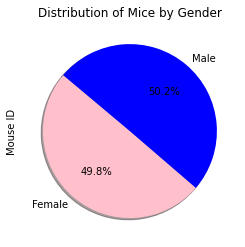

In [74]:
# Tells matplotlib to separate the section from the others
explode = (0.1, 0)

pie_chart_one = gender_group.plot.pie(y='Mouse ID', colors=colors, legend = False,
        autopct="%1.1f%%", shadow=True, title = "Distribution of Mice by Gender", startangle=140)
pie_chart_one

<AxesSubplot:title={'center':'Distribution of Mice by Gender'}, ylabel='Sex'>

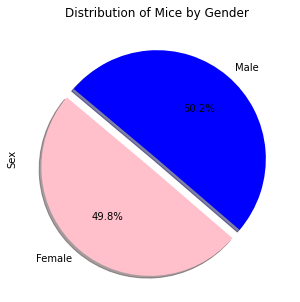

In [77]:
#Piechart by pyplot

pie_chart_two = gender_group["Mouse ID"].plot.pie(y = 'sizes', colors=colors, explode=explode, figsize = (5,5),  autopct="%1.1f%%", shadow=True, 
                            startangle=140)
plt.title("Distribution of Mice by Gender")
plt.ylabel("Sex")
pie_chart_two

Quartiles, Outliers and Boxplots

In [82]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Groupby drug regimen using loc
capomulin_quartiles = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin"]

# Start by getting the last (greatest) timepoint for each mouse
capomulin_lasttime = Capomulin_quartiles.groupby('Mouse ID').max()["Timepoint"]
capomulin_tumorvol = pd.DataFrame(Capomulin_lasttime)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capomulin_merge = pd.merge(Capomulin_tumorvol, merged_df, on=("Mouse ID", "Timepoint"),how="left")
capomulin_merge.head()

Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0     b128         45    Capomulin  Female           9          22   
1     b742         45    Capomulin    Male           7          21   
2     f966         20    Capomulin    Male          16          17   
3     g288         45    Capomulin    Male           3          19   
4     g316         45    Capomulin  Female          22          22   

   Tumor Volume (mm3)  Metastatic Sites  
0           38.982878                 2  
1           38.939633                 0  
2           30.485985                 0  
3           37.074024                 1  
4           40.159220                 2

In [83]:
cap_tumor_column = capomulin_merge["Tumor Volume (mm3)"]
quartiles = cap_tumor_column.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [90]:
#Ramicane
ramicane_quartiles = merged_df.loc[merged_df["Drug Regimen"] == "Ramicane"]
# Start by getting the last (greatest) timepoint for each mouse
ramicane_lasttime = ramicane_quartiles.groupby('Mouse ID').max()["Timepoint"]
ramicane_tumorvol = pd.DataFrame(ramicane_lasttime)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ramicane_merge = pd.merge(ramicane_tumorvol, merged_df, on=("Mouse ID", "Timepoint"),how="left")
ramicane_merge.head()

Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0     a411         45     Ramicane    Male           3          22   
1     a444         45     Ramicane  Female          10          25   
2     a520         45     Ramicane    Male          13          21   
3     a644         45     Ramicane  Female           7          17   
4     c458         30     Ramicane  Female          23          20   

   Tumor Volume (mm3)  Metastatic Sites  
0           38.407618                 1  
1           43.047543                 0  
2           38.810366                 1  
3           32.978522                 1  
4           38.342008                 2

In [91]:
ram_tumor_column = ramicane_merge["Tumor Volume (mm3)"]
quartiles = ram_tumor_column.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 31.56046955
The upper quartile of temperatures is: 40.65900627
The interquartile range of temperatures is: 9.098536719999998
The the median of temperatures is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [92]:
# Infubinol
infubinol_quartiles = merged_df.loc[merged_df["Drug Regimen"] == "Infubinol"]
# Start by getting the last (greatest) timepoint for each mouse
infubinol_lasttime = infubinol_quartiles.groupby('Mouse ID').max()["Timepoint"]
infubinol_tumorvol = pd.DataFrame(infubinol_lasttime)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
infubinol_merge = pd.merge(infubinol_tumorvol, merged_df, on=("Mouse ID", "Timepoint"),how="left")
infubinol_merge.head()

Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0     a203         45    Infubinol  Female          20          23   
1     a251         45    Infubinol  Female          21          25   
2     a577         30    Infubinol  Female           6          25   
3     a685         45    Infubinol    Male           8          30   
4     c139         45    Infubinol    Male          11          28   

   Tumor Volume (mm3)  Metastatic Sites  
0           67.973419                 2  
1           65.525743                 1  
2           57.031862                 2  
3           66.083066                 3  
4           72.226731                 2

In [93]:
inf_tumor_column = infubinol_merge["Tumor Volume (mm3)"]
quartiles = inf_tumor_column.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 54.04860769
The upper quartile of temperatures is: 65.52574285
The interquartile range of temperatures is: 11.477135160000003
The the median of temperatures is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [94]:
#Ceftamin
ceftamin_quartiles = merged_df.loc[merged_df["Drug Regimen"] == "Ceftamin"]
# Start by getting the last (greatest) timepoint for each mouse
ceftamin_lasttime = ceftamin_quartiles.groupby('Mouse ID').max()["Timepoint"]
ceftamin_tumorvol = pd.DataFrame(ceftamin_lasttime)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ceftamin_merge = pd.merge(ceftamin_tumorvol, merged_df, on=("Mouse ID", "Timepoint"),how="left")
ceftamin_merge.head()

Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0     a275         45     Ceftamin  Female          20          28   
1     b447          0     Ceftamin    Male           2          30   
2     b487         25     Ceftamin  Female           6          28   
3     b759         30     Ceftamin  Female          12          25   
4     f436         15     Ceftamin  Female           3          25   

   Tumor Volume (mm3)  Metastatic Sites  
0           62.999356                 3  
1           45.000000                 0  
2           56.057749                 1  
3           55.742829                 1  
4           48.722078                 2

In [95]:
cef_tumor_column = ceftamin_merge["Tumor Volume (mm3)"]
quartiles = cef_tumor_column.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


AttributeError: 'list' object has no attribute 'groupby'

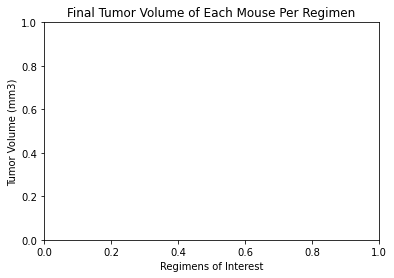

In [100]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of Each Mouse Per Regimen")
ax1.set_xlabel('Regimens of Interest')
ax1.set_ylabel('Tumor Volume (mm3)')

#Combining each drug regimen to loop through
boxplot_data = [cef_tumor_column, inf_tumor_column, ram_tumor_column, cap_tumor_column]
regimen = ["Ceftamin", "Infubinol","Ramicane","Capomulin"]
vol_list = boxplot_data.groupby('Drug Regimen')["Tumor Volume (mm3)"]
vol_list_df = pd.DataFrame(vol_list)
boxplot_vol_loop = [vol for vol in vol_list_df["Tumor Volume (mm3)"]]
ax1.boxplot(boxplot_vol_loop, labels = regimen )
plt.show()